# Kaggle Bike Sharing Demand
- http://www.kaggle.com/c/bike-sharing-demand
- 멀티캠퍼스 이정구강사님, 정지훈 강사님 자료 합친 것입니다. 두 분께 모두 감사드립니다.
- Bike_Sharing_Demand.csv (10,886 * 12)
   - <font color = 'blue'>datetime : Date + Timestamp</font>
   - season : 1(봄), 2(여름), 3(가을), 4(겨울)
   - holiday : 0(휴일이 아닌 날), 1(토요일, 일요일을 제외한 공휴일)
   - workingday : 0(주말 및 휴일), 1(토요일, 일요일 및 휴일이 아닌 주중)
   - weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/ 번개)
   - temp : 온도(섭씨)
   - atemp : 체감온도(섭씨)
   - humidity : 습도
   - windspeed : 풍속
   - casual : 사전 등록되지 않은 사용자 대여 횟수
   - registered : 사전 등록된 사용자 대여 횟수
   - <font color = 'red'>count : 총 대여 횟수 -> 'y' 

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 0. Data Load
- 문제 정의: 각 시간대 별로 자전거 대여 수량을 예측하세요.

In [5]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sampleSubmission.csv")

In [6]:
print(train.info())
print(test.info())
print(sub.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6

## 1. Data Preprocessing(피처 수정)
### 1) 'object' -> 'datetime64'

In [7]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### 2) 'year', 'month', 'day', 'hour', 'weekday' 추출

In [10]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday

In [11]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


In [ ]:
### 또 다른 방법: apply()
##1. 우선 다음과 같이 테스트를 한다. 
# text = "2011-01-01 00:00:00"
# text.split()[1].split(":")[2] >>> 00

# train['date'] = train['datetime'].apply(lambda x: x.split()[0])  # 날짜 피처 생성
# train['year']= train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# train['month']= train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# train['day']= train['datetime'].apply(lambda x: x.split()[0].split('-')[2])

# train['hour']= train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# train['minute']= train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
# train['second']= train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

### 3) Drop Columns
- 'datetime'

In [15]:
train.drop(columns = 'datetime', axis = 1, inplace=True)
train.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5


### 4) 분석용 DataFrame 백업

In [16]:
train_0 = train.copy()
train_0.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5


### 5) 시각화 레이블 변환

In [17]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})

train['holiday'] = train['holiday'].map({0: 'WorkingDay', 
                                         1: 'Holiday'})

train['workingday'] = train['workingday'].map({0: 'Holiday', 
                                               1: 'WorkingDay'})

train['weekday'] = train['weekday'].map({0: 'Monday',
                                   1: 'Tuesday',
                                   2: 'Wednesday',
                                   3: 'Thursday',
                                   4: 'Friday',
                                   5: 'Saturday',
                                   6: 'Sunday'})

In [18]:
train.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,Spring,WorkingDay,Holiday,Clear,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday


In [ ]:
### 또 다른 방법(요일 변환)
# from datetime import datetime
# import calendar
# sample_dt = train['date'][300]  # str타입의 날짜
# print(datetime.strptime(sample_dt, "%Y-%m-%d")) # datetime 타입으로 변경
# print(datetime.strptime(sample_dt, "%Y-%m-%d").weekday())  # 정수로 요일 반환
# print(calendar.day_name[3])  # 요일 변환

# train['weekday'] = train['date'].apply(
#     lambda x: calendar.day_name[datetime.strptime(x, "%Y-%m-%d").weekday()])
# train.head(1)


# 2. 탐색적 데이터 분석(EDA)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) 전체 count 분포

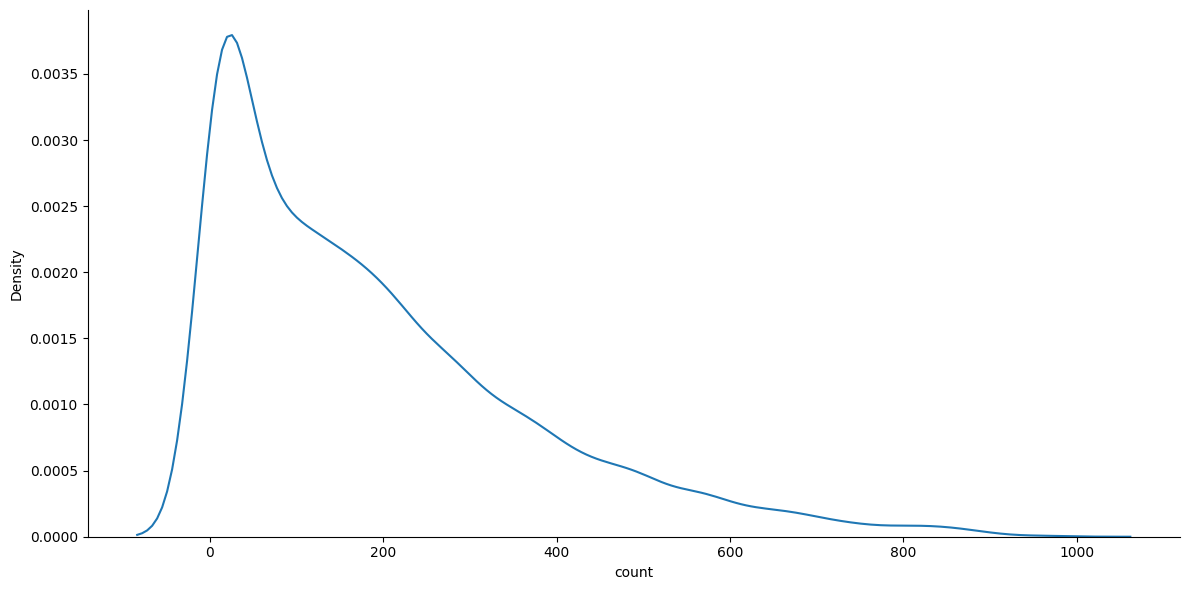

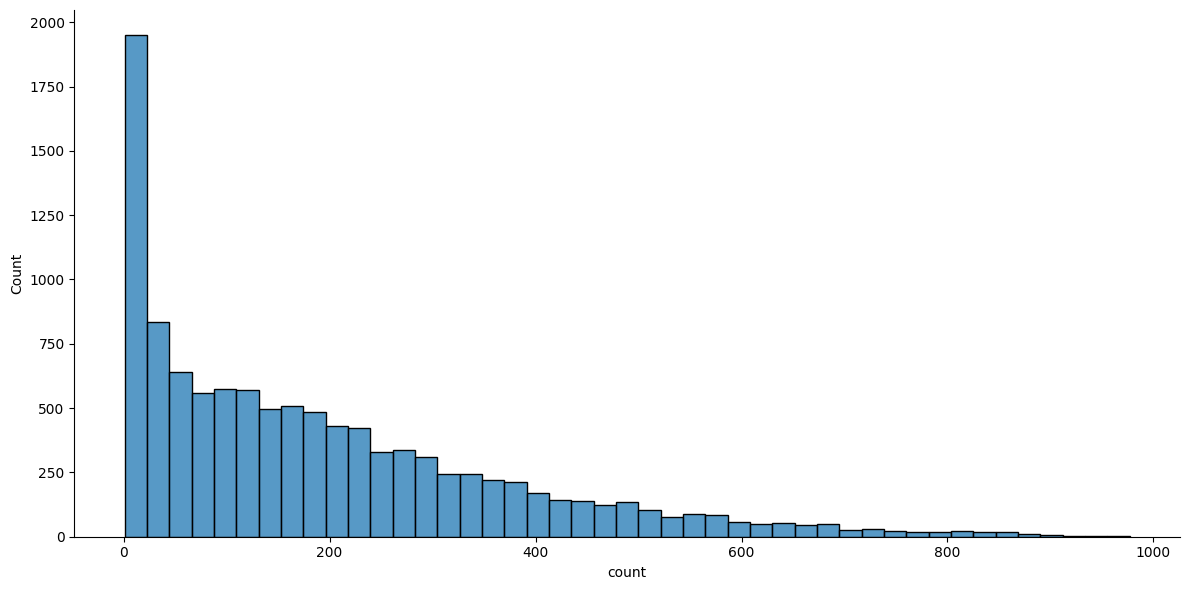

In [22]:
sns.displot(train['count'], height =6, aspect = 2, kind="kde")
sns.displot(train['count'], height =6, aspect = 2)
plt.show()

- count 평균

In [24]:
train['count'].mean()

191.57413191254824

## 2) 'year' - 연도별 평균 대여 수
- groupby() 적용

In [25]:
train.groupby(['year'])['count'].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

- 막대 그래프

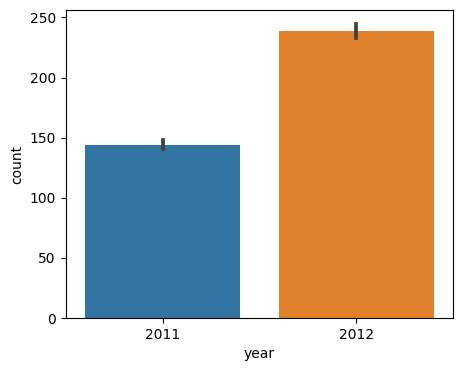

In [27]:
plt.figure(figsize = (5, 4))
sns.barplot(x = 'year', 
            y = 'count', 
            data = train)
plt.show()

## 3) 'month' - 월별 평균 대여 횟수

In [28]:
train.groupby(['month'])['count'].mean()

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

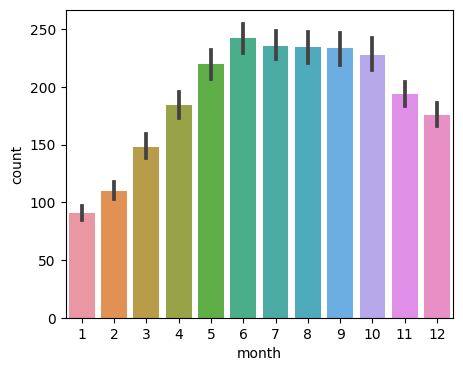

In [29]:
plt.figure(figsize = (5, 4))
sns.barplot(x = 'month', 
            y = 'count', 
            data = train)
plt.show()

- 선 그래프

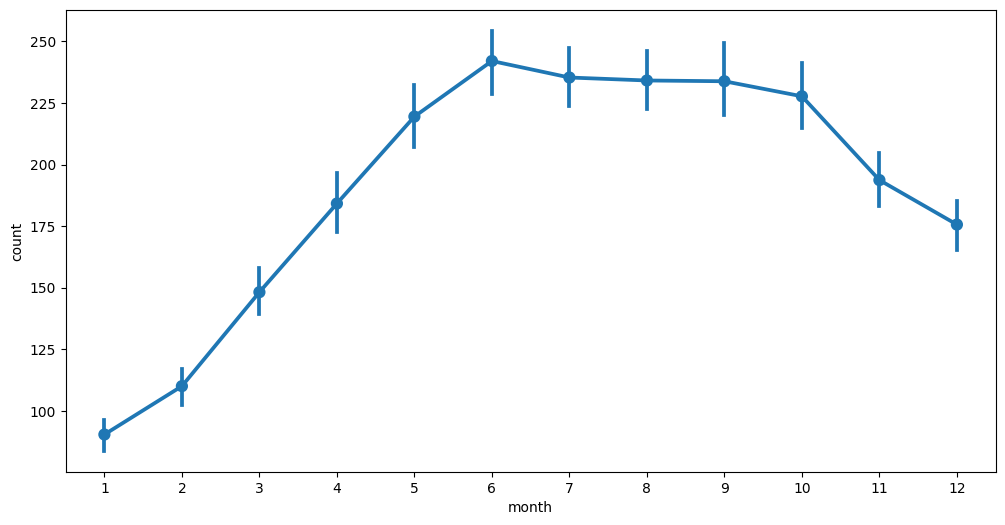

In [30]:
plt.figure(figsize = (12, 6))
sns.pointplot(x = 'month',
              y = 'count',
              data = train)
plt.show()

In [31]:
train.groupby(['month'])['count'].count()

month
1     884
2     901
3     901
4     909
5     912
6     912
7     912
8     912
9     909
10    911
11    911
12    912
Name: count, dtype: int64

- 상자 그래프

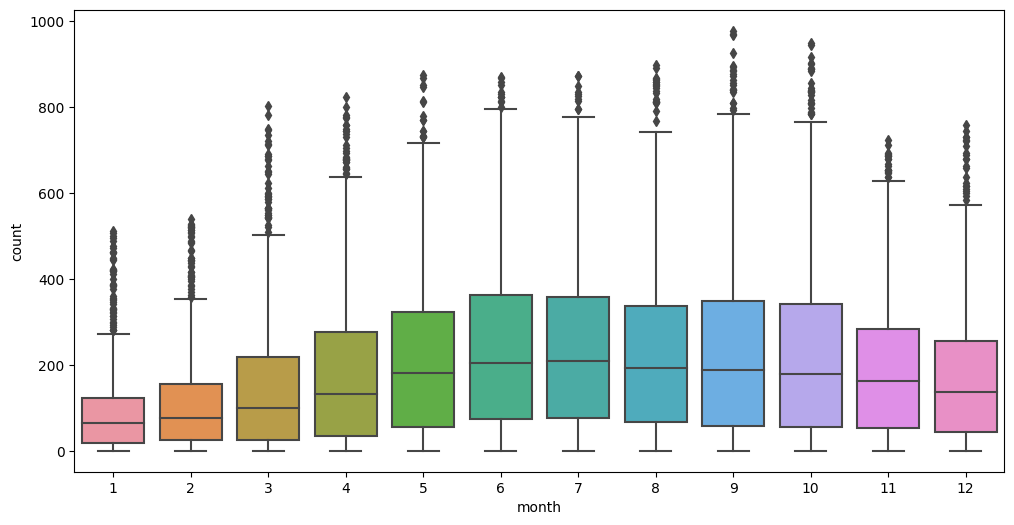

In [32]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'month',
            y = 'count', 
            data = train)
plt.show()

## 4) 'atemp' - 평균 체감온도

In [34]:
train.groupby(['month'])['atemp'].mean()

month
1     12.077579
2     14.532608
3     19.017220
4     22.305891
5     26.632374
6     30.988750
7     34.900395
8     33.122001
9     29.590248
10    24.739682
11    18.326054
12    17.117220
Name: atemp, dtype: float64

- 월별 체감 온도

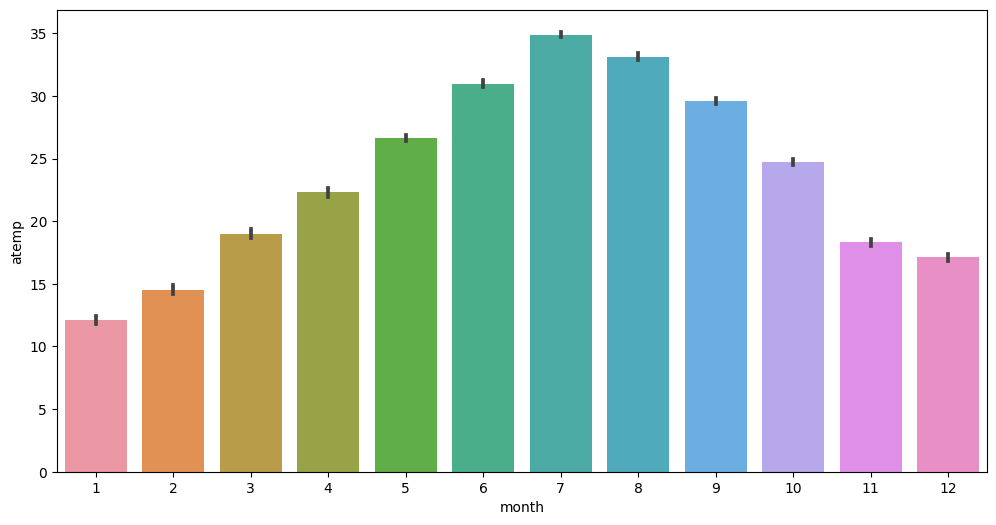

In [35]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'month',
            y = 'atemp',
            data= train)
plt.show()

- 체감 온도 vs. 대여 수

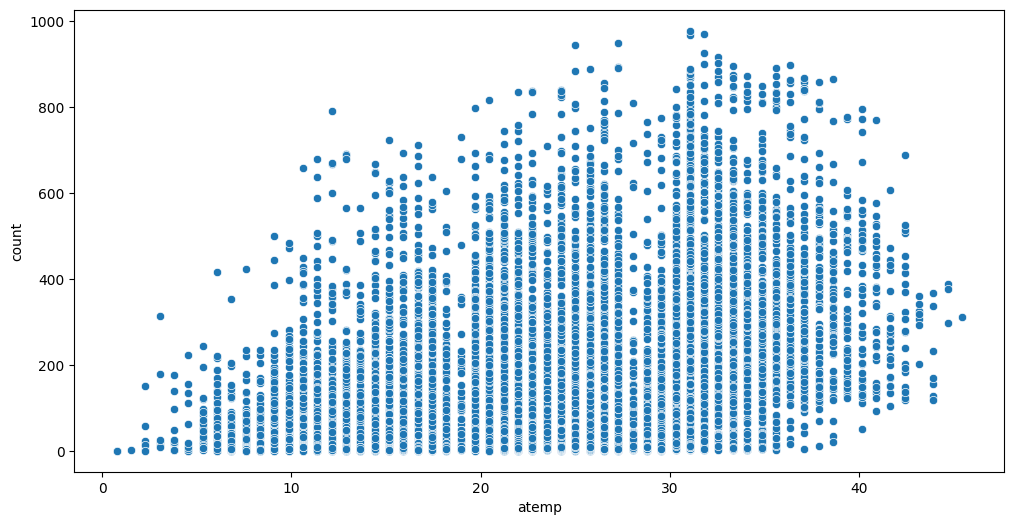

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='atemp', 
                y= 'count',
                data= train)
plt.show()

## 5) 'season' - 계절 별 평균 대여 횟수

In [37]:
train.groupby(['season'])['count'].mean()

season
Fall      234.417124
Spring    116.343261
Summer    215.251372
Winter    198.988296
Name: count, dtype: float64

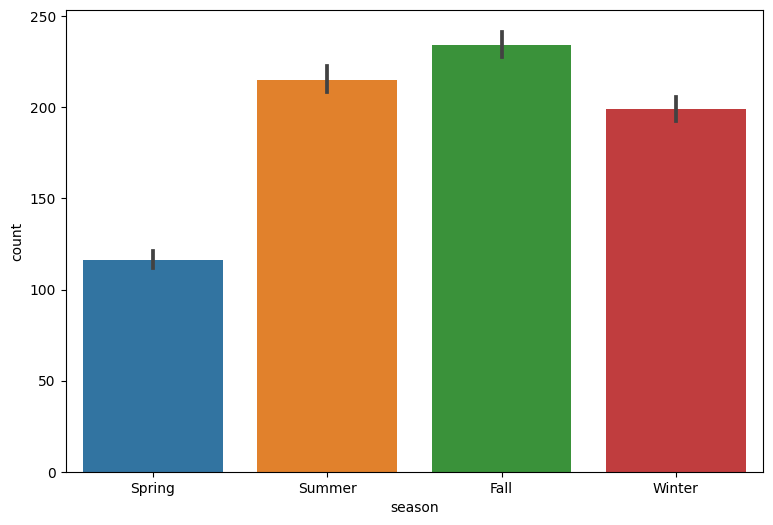

In [38]:
plt.figure(figsize = (9, 6))
sns.barplot(x='season',
            y = 'count',
            data = train)
plt.show()

## 6) 'weather' - 날씨 별 빈도 수
- 막대 그래프

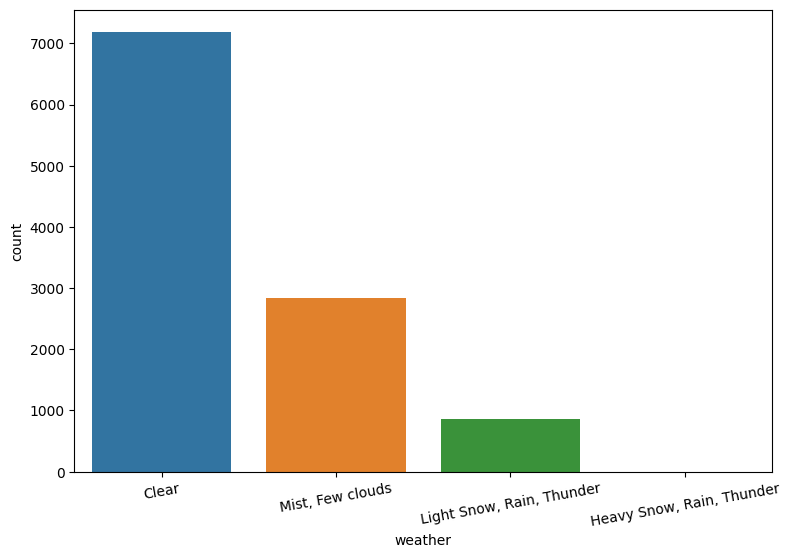

In [42]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation = 10)
sns.countplot(x= 'weather', data = train)
plt.show()

- stripplot으로 '4' 확인

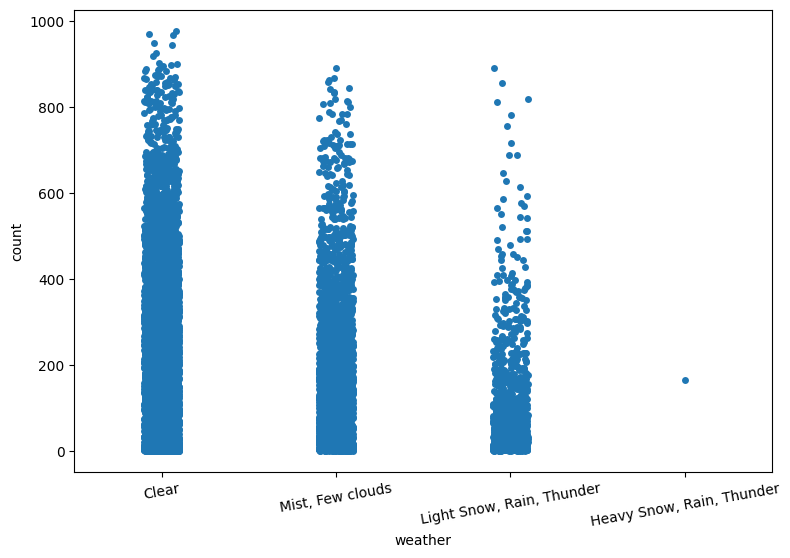

In [43]:
plt.figure(figsize = (9, 6))
plt.xticks(rotation=10)
sns.stripplot(x = 'weather', 
              y = 'count',
              data = train)
plt.show()

- '4'의 정보 확인

In [44]:
train['weather'].value_counts()

weather
Clear                        7192
Mist, Few clouds             2834
Light Snow, Rain, Thunder     859
Heavy Snow, Rain, Thunder       1
Name: count, dtype: int64

In [45]:
train.loc[train['weather'] == 'Heavy Snow, Rain, Thunder']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
5631,Spring,WorkingDay,WorkingDay,"Heavy Snow, Rain, Thunder",8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,Monday


In [46]:
train.groupby(['weather'])['count'].sum()

weather
Clear                        1476063
Heavy Snow, Rain, Thunder        164
Light Snow, Rain, Thunder     102089
Mist, Few clouds              507160
Name: count, dtype: int64

## 7) 'hour' - 시간별 평균 대여 횟수

In [47]:
train.groupby(['hour'])['count'].mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

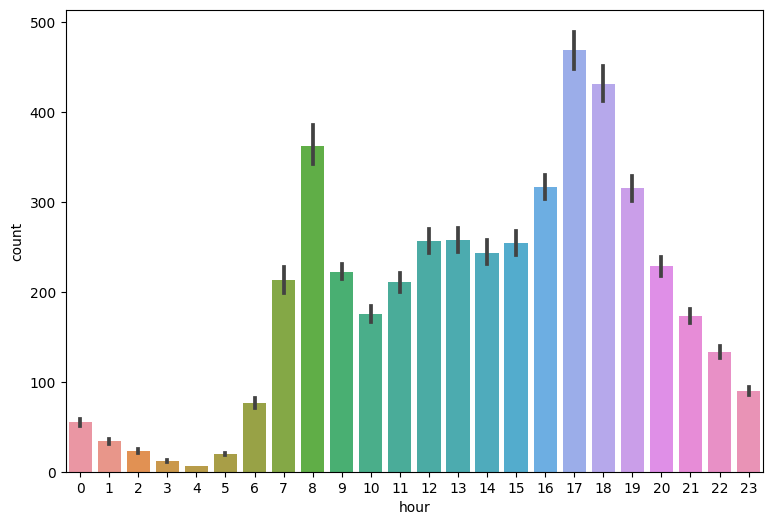

In [48]:
plt.figure(figsize = (9, 6))
sns.barplot(x = 'hour', 
            y = 'count',
            data = train)
plt.show()

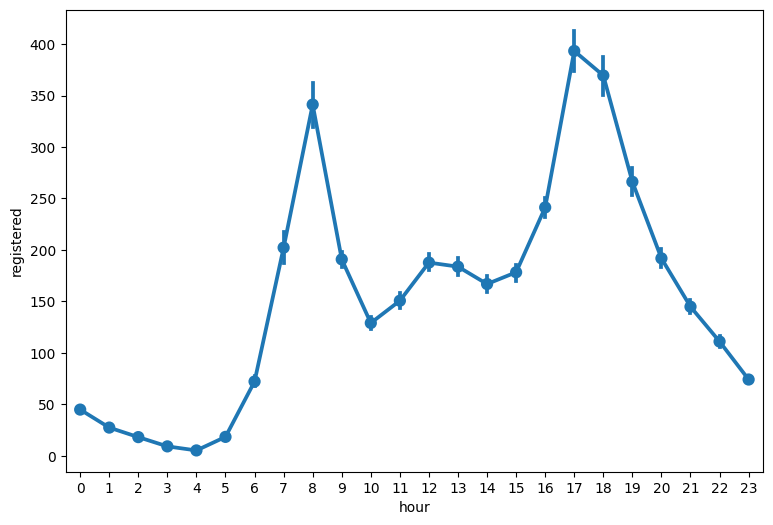

In [50]:
plt.figure(figsize = (9, 6))
sns.pointplot(x = 'hour', 
            y = 'registered',
            data = train)
plt.show()

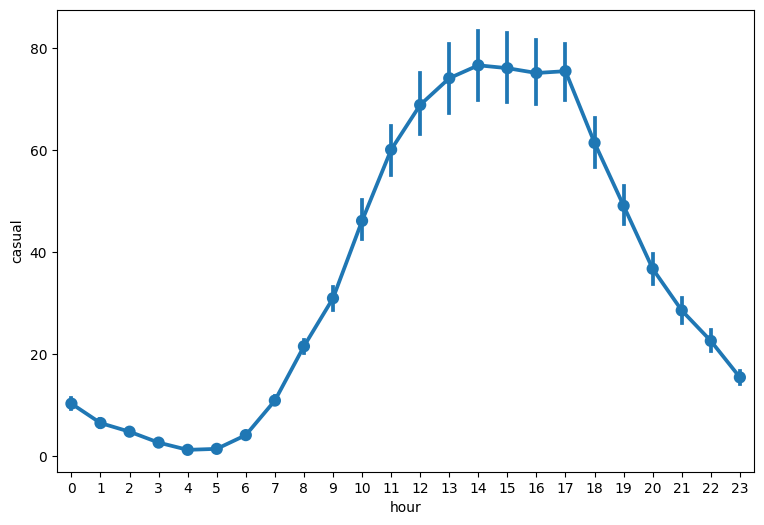

In [51]:
plt.figure(figsize = (9, 6))
sns.pointplot(x = 'hour', 
            y = 'casual',
            data = train)
plt.show()

## 8) 'weekday' - 요일별 평균 대여 횟수

In [52]:
train.groupby(['weekday'])['count'].mean()

weekday
Friday       197.844343
Monday       190.390716
Saturday     196.665404
Sunday       180.839772
Thursday     197.296201
Tuesday      189.723847
Wednesday    188.411348
Name: count, dtype: float64

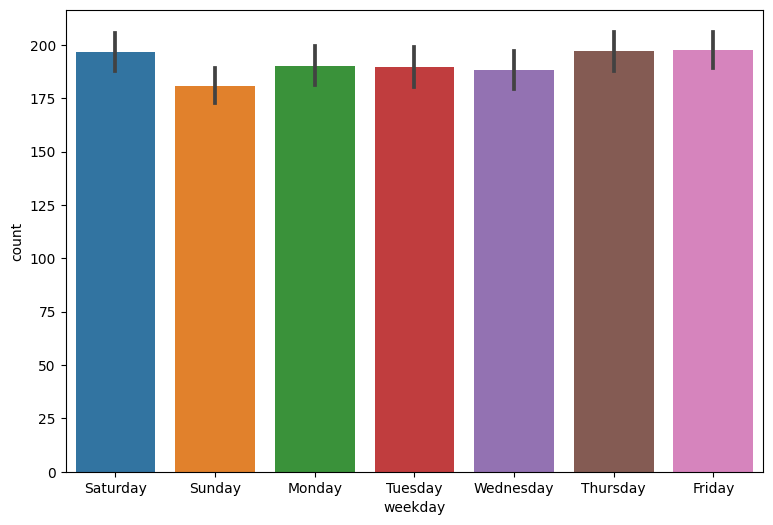

In [53]:
plt.figure(figsize = (9, 6))
sns.barplot(x = 'weekday', 
            y = 'count',
            data = train)
plt.show()

In [54]:
train.groupby(['weekday'])['count'].sum()

weekday
Friday       302504
Monday       295296
Saturday     311518
Sunday       285546
Thursday     306401
Tuesday      291985
Wednesday    292226
Name: count, dtype: int64

## 9) 'holiday' and 'workingday'

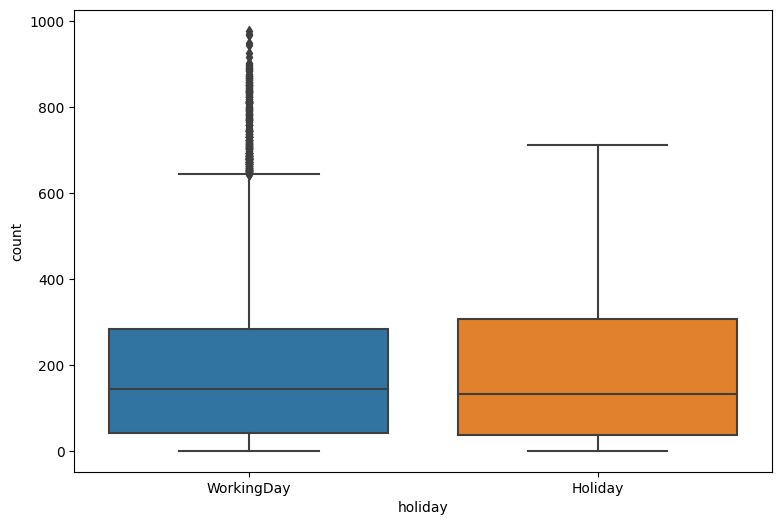

In [55]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'holiday', 
            y = 'count',
            data = train)
plt.show()

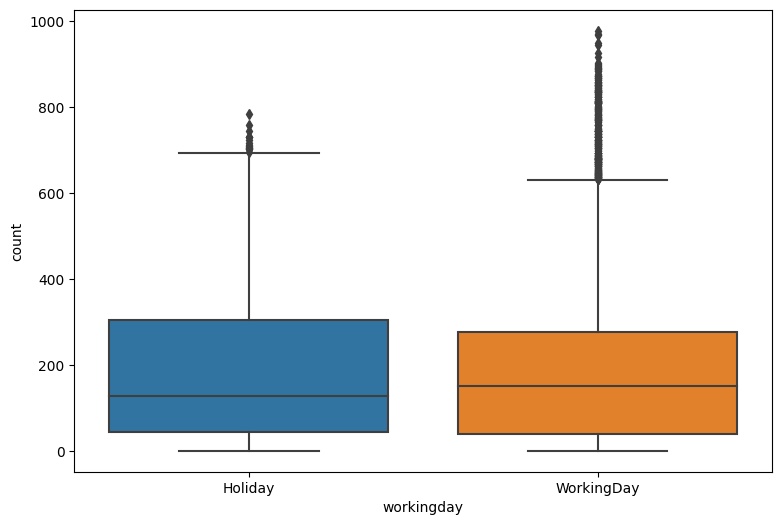

In [56]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'workingday', 
            y = 'count',
            data = train)
plt.show()

## 10) 종합
- 막대 그래프

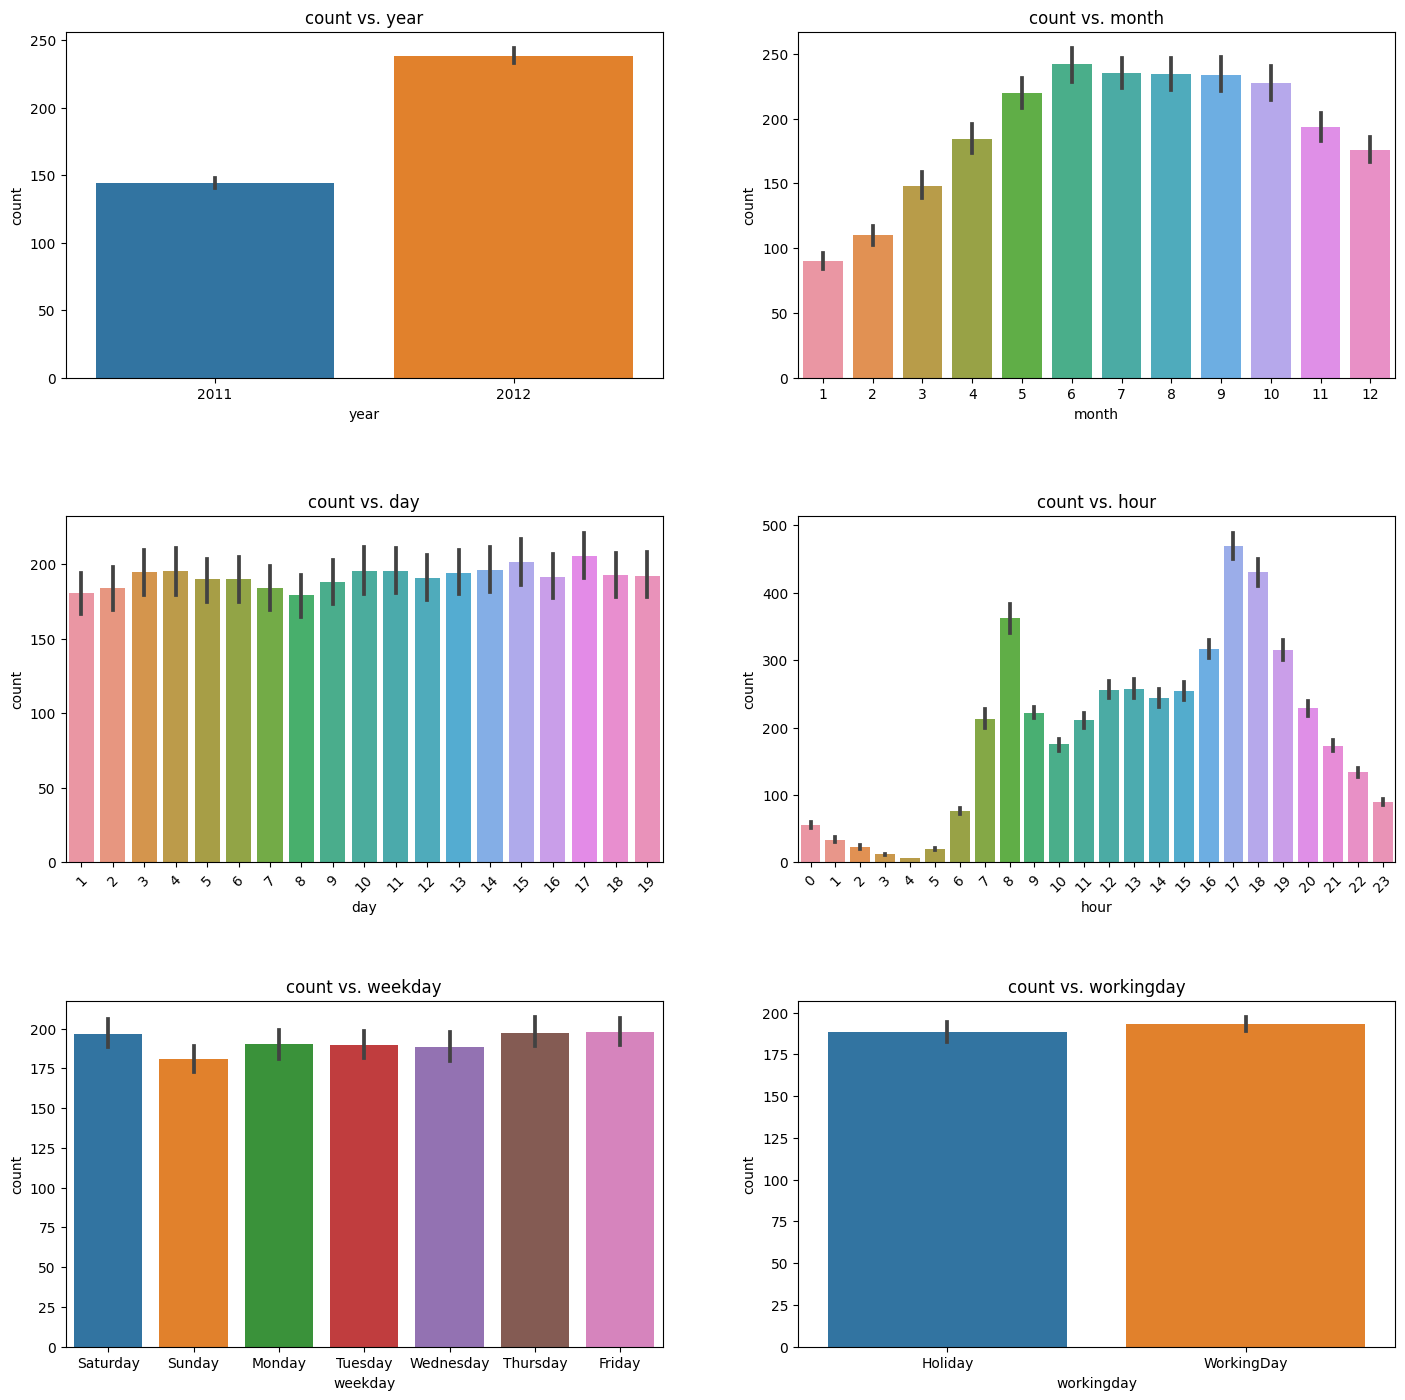

In [63]:
figure, axes = plt.subplots(nrows =3, ncols=2)
plt.tight_layout()
figure.set_size_inches(15, 15)

sns.barplot(x = 'year', y = 'count', data = train, ax = axes[0, 0])
sns.barplot(x = 'month', y = 'count', data = train, ax = axes[0, 1])
sns.barplot(x = 'day', y = 'count', data = train, ax = axes[1, 0])
sns.barplot(x = 'hour', y = 'count', data = train, ax = axes[1, 1])
sns.barplot(x = 'weekday', y = 'count', data = train, ax = axes[2, 0])
sns.barplot(x = 'workingday', y = 'count', data = train, ax = axes[2, 1])

axes[0, 0].set(title = 'count vs. year')
axes[0, 1].set(title = 'count vs. month')
axes[1, 0].set(title = 'count vs. day')
axes[1, 1].set(title = 'count vs. hour')
axes[2, 0].set(title = 'count vs. weekday')
axes[2, 1].set(title = 'count vs. workingday')

axes[1, 0].tick_params(axis = 'x', labelrotation = 45)
axes[1, 1].tick_params(axis = 'x', labelrotation = 45)
plt.show()

- 상자 그래프

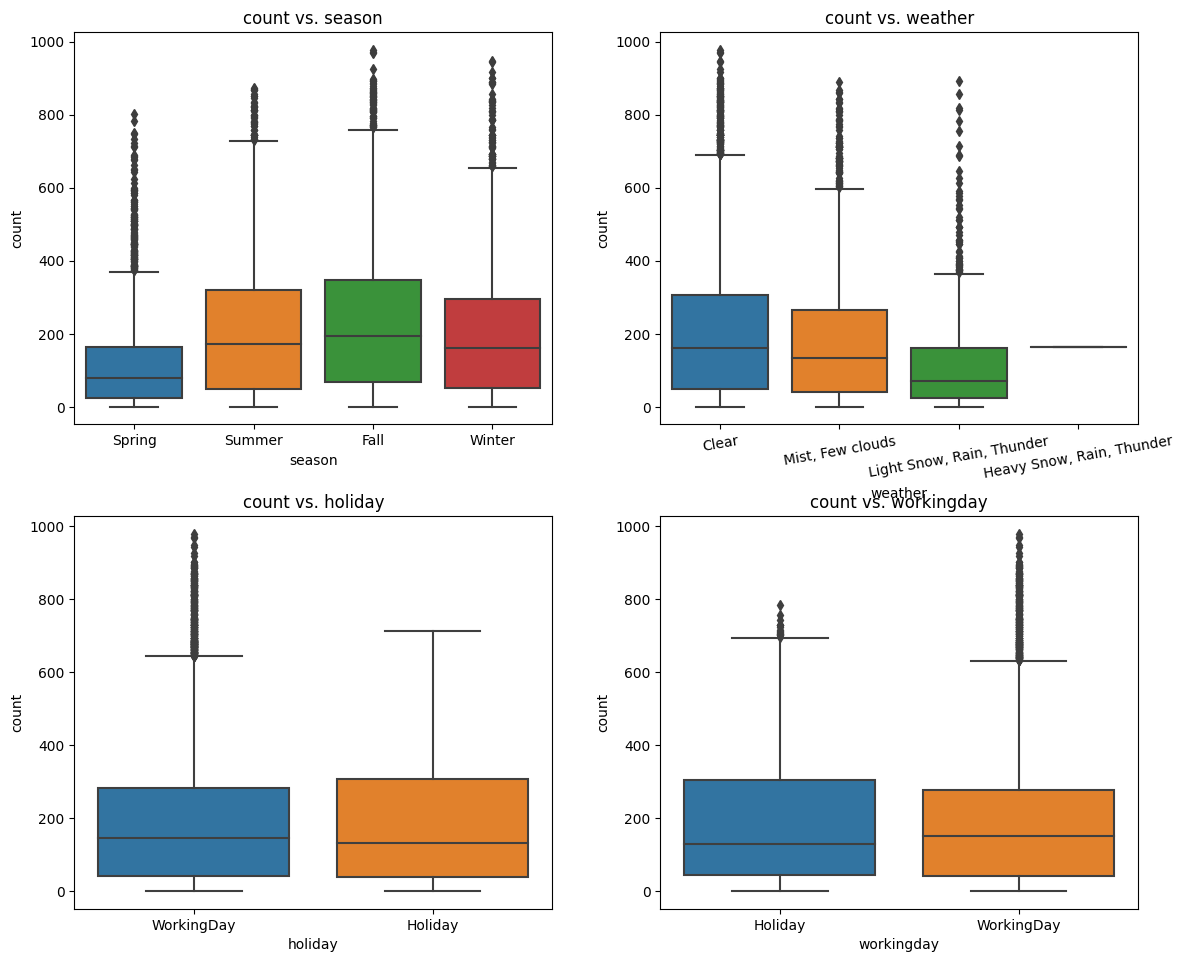

In [66]:
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(12, 10)

sns.boxplot(x = 'season', y = 'count', data = train, ax = axes[0, 0])
sns.boxplot(x = 'weather', y = 'count', data = train, ax = axes[0, 1])
sns.boxplot(x = 'holiday', y = 'count', data = train, ax = axes[1, 0])
sns.boxplot(x = 'workingday', y = 'count', data = train, ax = axes[1, 1])

axes[0, 0].set(title='count vs. season')
axes[0, 1].set(title='count vs. weather')
axes[1, 0].set(title='count vs. holiday')
axes[1, 1].set(title='count vs. workingday')

axes[0, 1].tick_params(axis = 'x', labelrotation = 10)
plt.show()

- 선 그래프

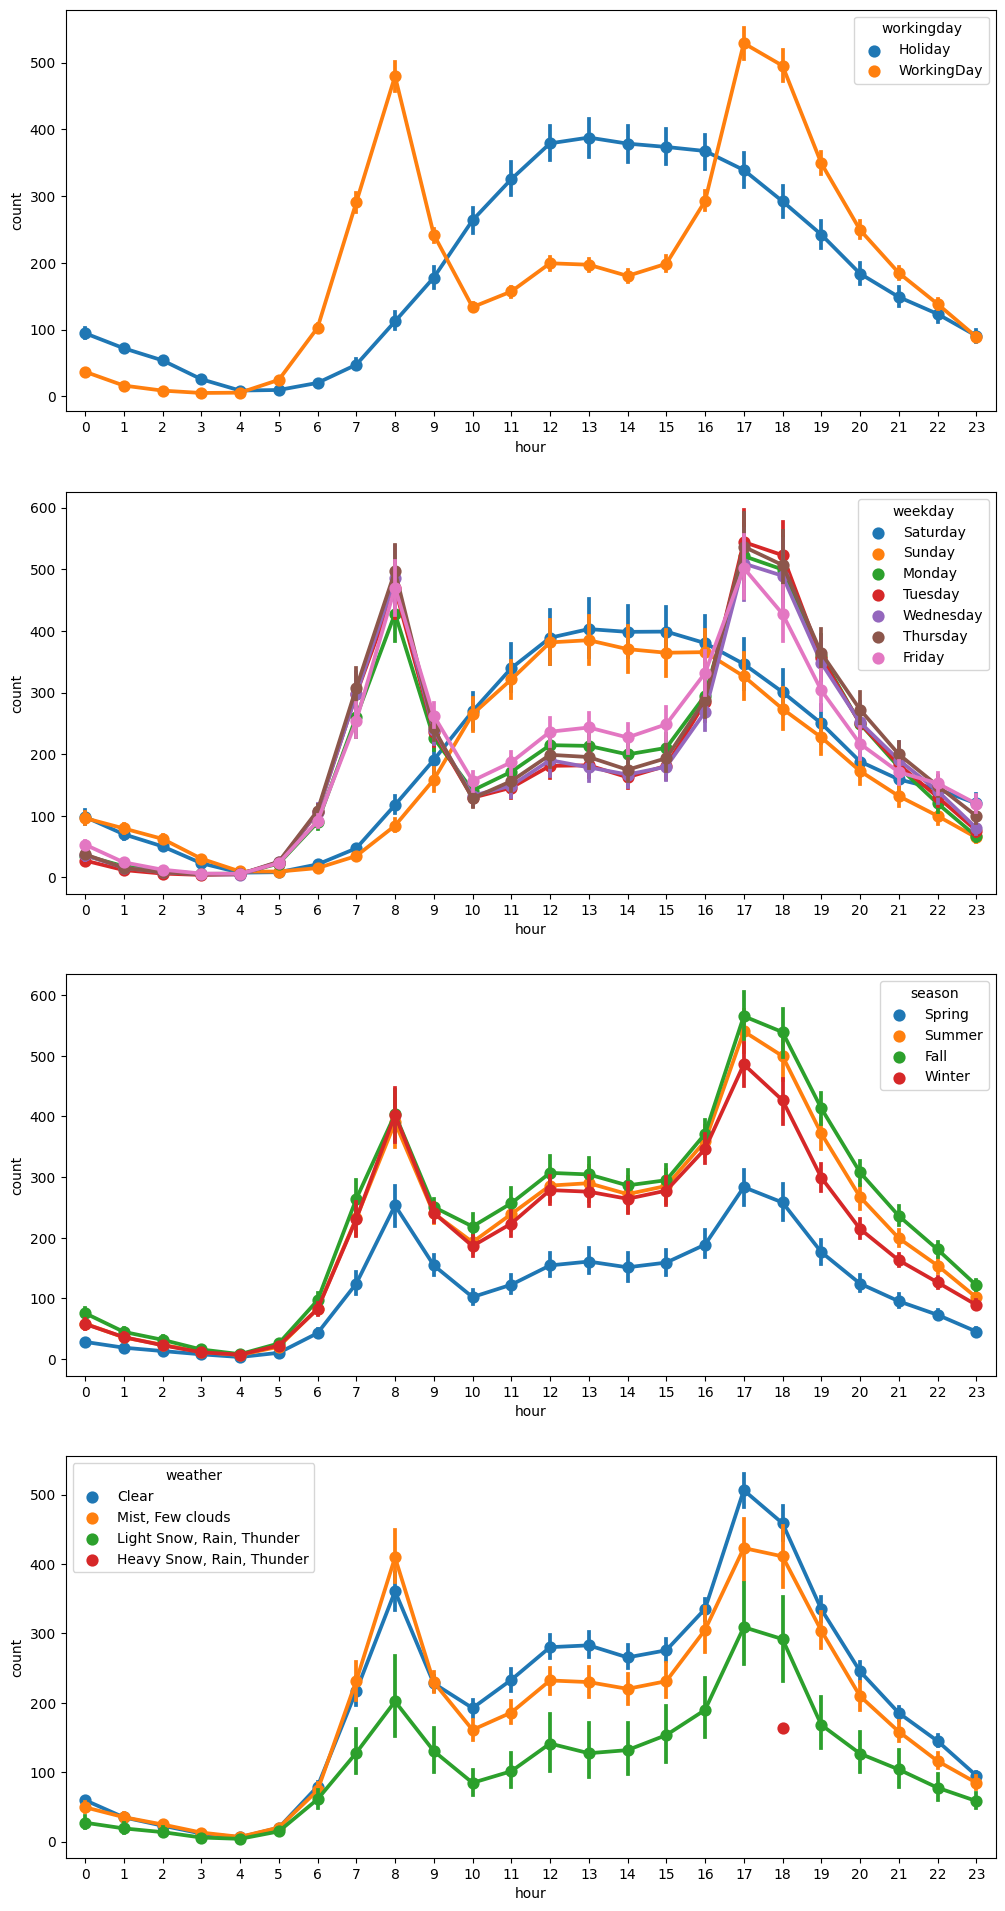

In [67]:
figure, axes = plt.subplots(nrows = 4)
figure.set_size_inches(12, 24)

sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'workingday', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weekday', ax = axes[1])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'season', ax = axes[2])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weather', ax = axes[3])
plt.show()

- 산점도

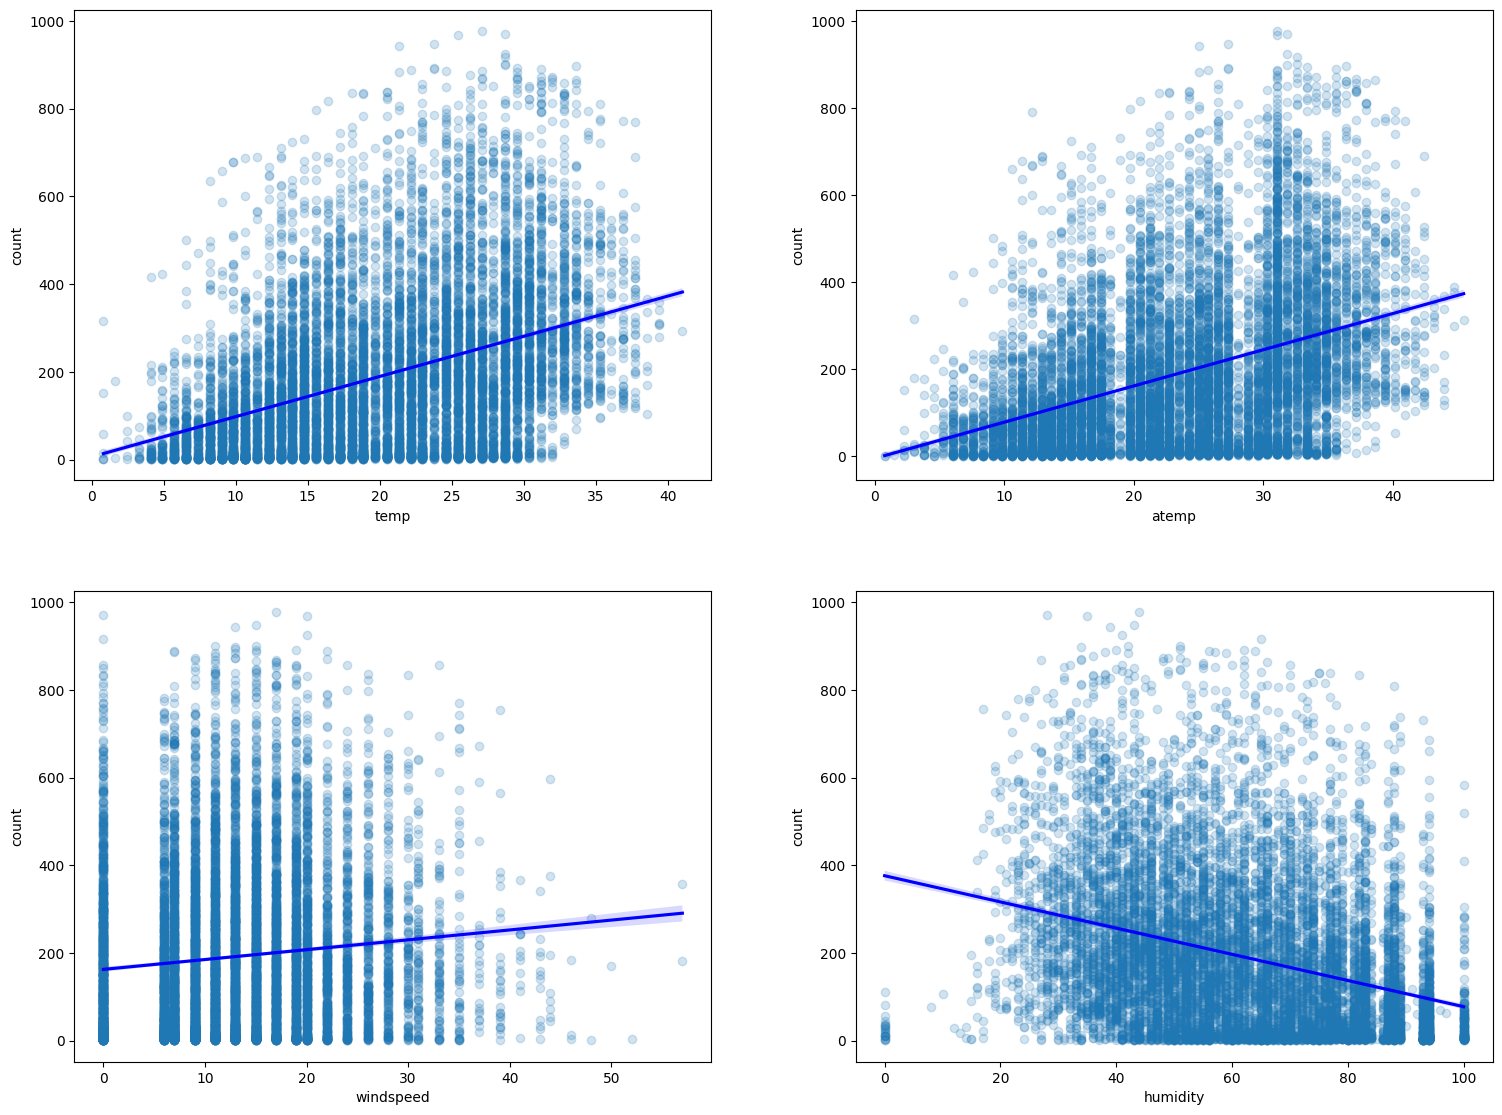

In [69]:
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(16, 12)

sns.regplot(x = 'temp', y = 'count', data = train, ax = axes[0, 0],
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'atemp', y = 'count', data = train, ax = axes[0, 1],
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'windspeed', y = 'count', data = train, ax = axes[1, 0],
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'humidity', y = 'count', data = train, ax = axes[1, 1],
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
plt.show()

## 11) HeatMap -연속형 데이터
- 연속형 데이터 상관계수('r')

In [70]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


- Heatmap visualization

[Text(0.5, 1.0, 'HeatMap of Numerical Data')]

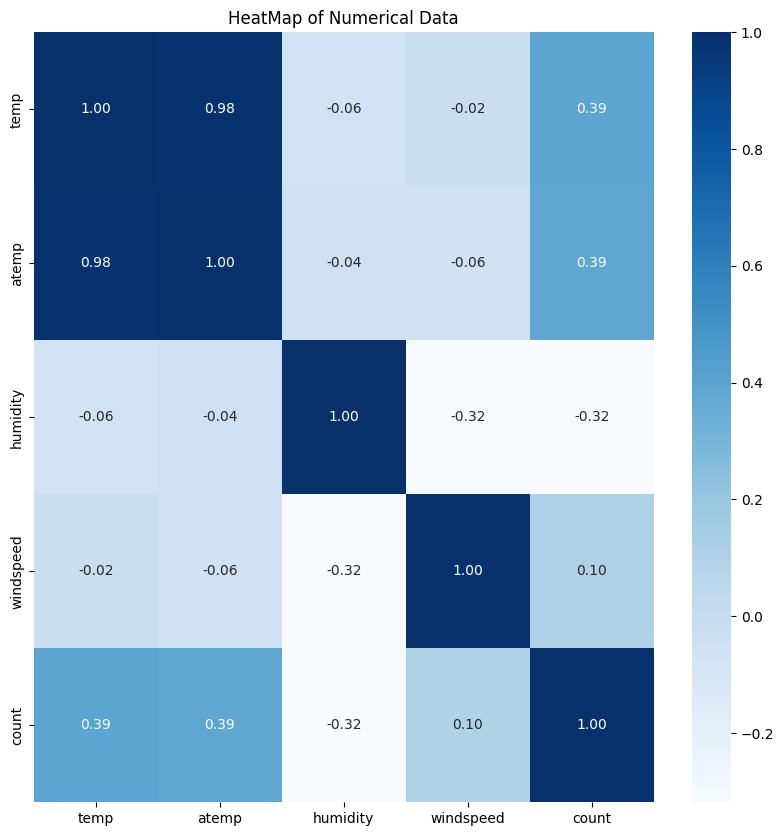

In [72]:
heatMap = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

sns.heatmap(heatMap,
            annot = True,
            cmap = 'Blues',
            fmt = '.2f')

ax.set(title='HeatMap of Numerical Data')

### End

### 시각화
- 우리는 **y값(종속변수)**를 예측을 하고자 한다.
- **count** = 기울기x1 + x2 + x3 ...
- 시각화를 한다면 **count**는 고정!
    - count는 수치데이터이다.
    - 수치데이터를 기반으로 한 시각화의 종류를 파악하자.
    - 히스토그램 : count
    - 산점도 : y = count, x = 수치형 변수
    - 막대그래프, boxplot, 선그래프: y = count, x = 범주형 변수 또는 날짜
    - 히트맵 : 수치형 vs. 수치형

### 탐색적 데이터 분석
- 머신러닝을 진행할 때 탐색적 데이터 분석을 왜 하는 걸까?
    - 머신러닝 - 예측을 하기 위한 방법론
    - 최신 알고리즘이 있으니까 그거 쓰면 다 되는 거 아닌가?
- 시각화를 작성해서 얻고자 하는 목적은?
    - 탐색적 데이터 분석 <==> Feature Engineering
    - 피처 엔지니어링-> **머신러닝 알고리즘에 적용할 독립변수를 찾아서** 넣어주는 것(이것이 시각화의 목적)

- 미래 예측을 한다고 할 때, 최소 1개의 독립변수가 필요하다. (y=ax에서의 a가 독립변수)

> "내가 사용하고자 하는 독립변수 x 컬럼이 정말로 y 변수에 중요한 영향을 끼치는 변수일까"를 고민하기
>> 여러 컬럼들이 중복이 될 수도 있고, 아니면 중요하지 않은 컬럼도 있을 수도 있다. 이러한 컬럼들을 찾고 적절하게 전처리를 하는 것(종속 변수에 영향을 주냐 안주냐)!!!  

### 종속 변수를 로그변환

<Axes: xlabel='count', ylabel='Count'>

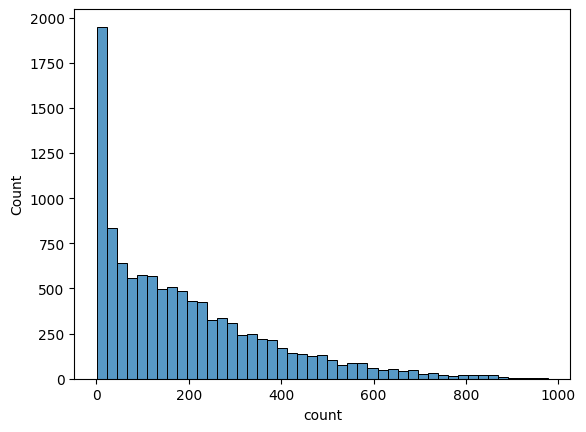

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots()
sns.histplot(train['count'])

- 오른쪽으로 꼬리가 긴 그래프가 나왔다.
- 정규분포를 따르지 않는다. -> 아래 코드처럼 로그변환 같은 것을 해서 강제로 정규 분포를 가지게끔 한다.

<Axes: xlabel='count', ylabel='Count'>

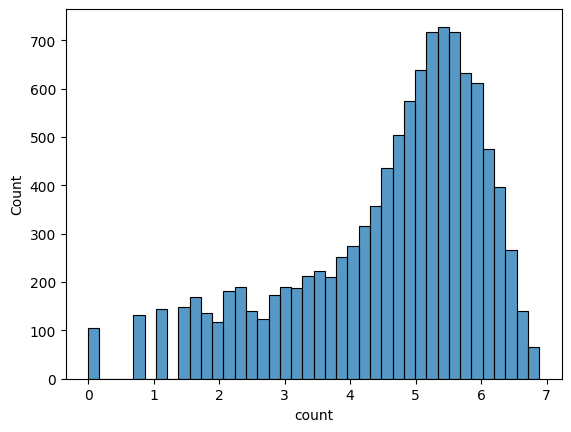

In [76]:
sns.histplot(np.log(train['count']))

- 첫 번째 작업 완료
    - 종속 변수는 로그변환을 취해서 학습을 진행하기로 한다.
    - 로그변환을 하면, 예측했을 때 로그변환된 값을 예측하는 것!
    - 로그변환된 값을 다시 지수변환을 하여 최종 예측을 해야한다.

### 막대그래프
- 우선 영향을 줄 것 같은 변수들을 이렇게 시각화해놓고 무엇을 취할 것인지 고민해본다.
- second, minute 컬럼은 아무런 정보가 없으므로 그냥 독립변수 후보에서 지운다.

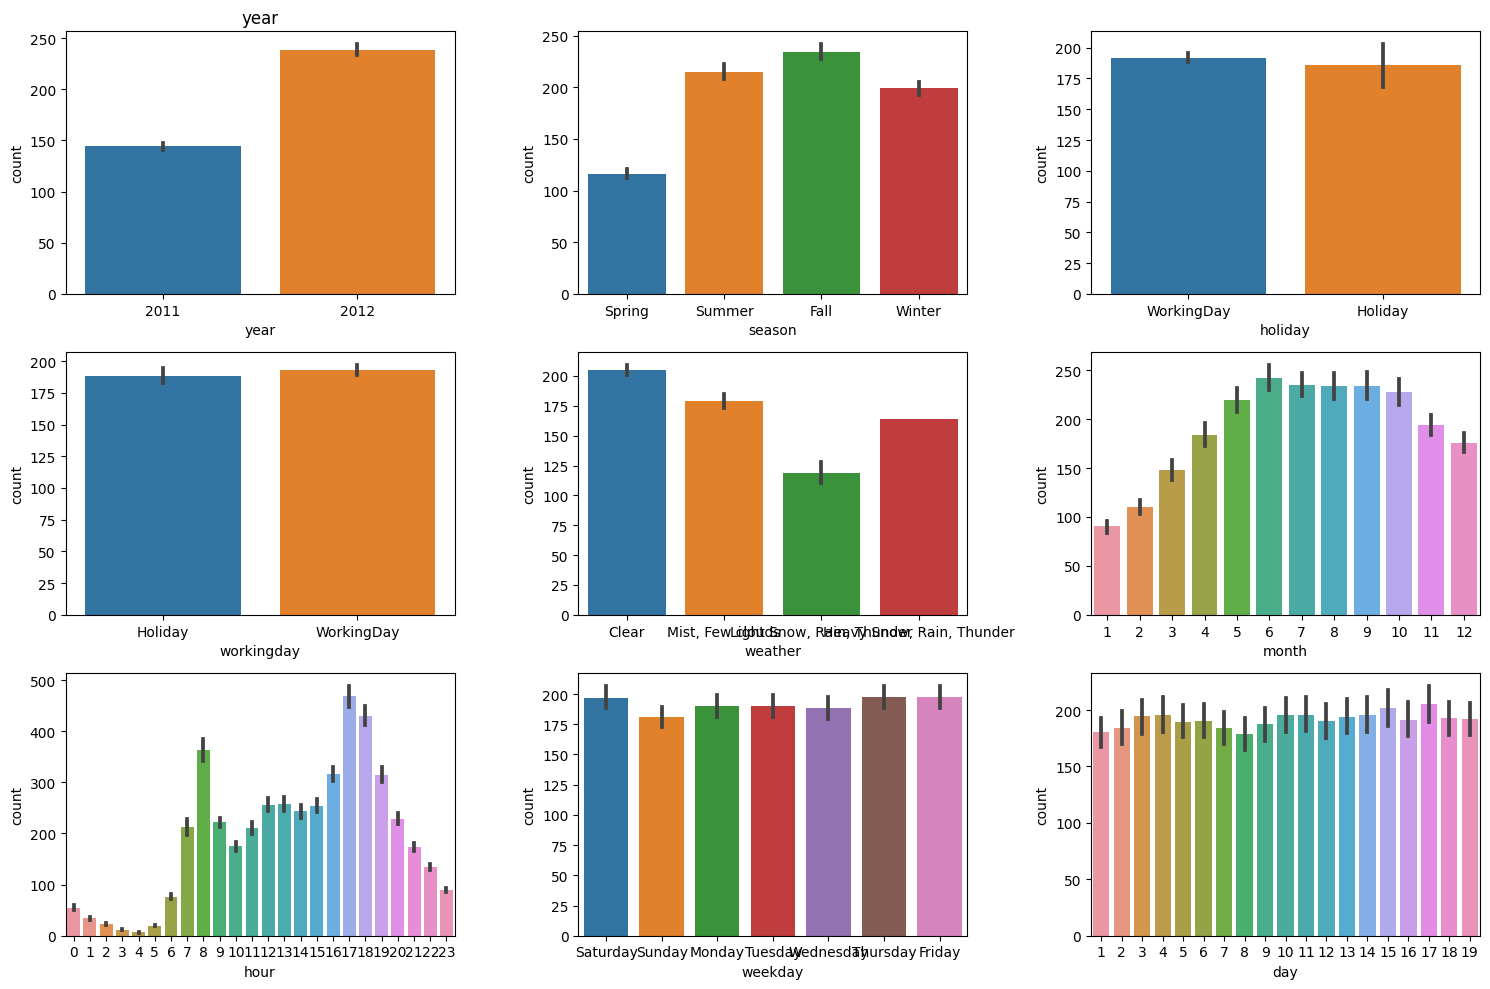

In [77]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (15, 10))
sns.barplot(x='year', y = 'count', data = train, ax=ax[0, 0])
ax[0,0].set_title("year")
sns.barplot(x='season', y = 'count', data = train, ax=ax[0, 1])
sns.barplot(x='holiday', y = 'count', data = train, ax=ax[0, 2])
sns.barplot(x='workingday', y = 'count', data = train, ax=ax[1, 0])
sns.barplot(x='weather', y = 'count', data = train, ax=ax[1, 1])
sns.barplot(x='month', y = 'count', data = train, ax=ax[1, 2])
sns.barplot(x='hour', y = 'count', data = train, ax=ax[2, 0])
sns.barplot(x='weekday', y = 'count', data = train, ax=ax[2, 1])
sns.barplot(x='day', y = 'count', data = train, ax=ax[2, 2])

plt.tight_layout()  # 그래프 간격 조금 넗힘
plt.show()

In [78]:
test['date'] = test['datetime'].apply(lambda x: x.split()[0])  # 날짜 피처 생성
test['year']= test['datetime'].apply(lambda x: x.split()[0].split('-')[0])
test['month']= test['datetime'].apply(lambda x: x.split()[0].split('-')[1])
test['day']= test['datetime'].apply(lambda x: x.split()[0].split('-')[2])

test['hour']= test['datetime'].apply(lambda x: x.split()[1].split(':')[0])
test['minute']= test['datetime'].apply(lambda x: x.split()[1].split(':')[1])
test['second']= test['datetime'].apply(lambda x: x.split()[1].split(':')[2])
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,2011,01,20,00,00,00
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,01,00,00
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,02,00,00
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,03,00,00
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,19,00,00
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,20,00,00
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,21,00,00
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012-12-31,2012,12,31,22,00,00


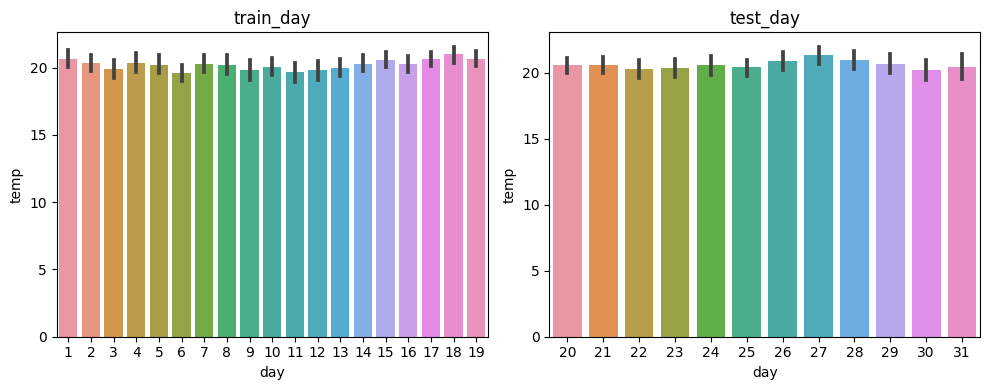

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 4))
sns.barplot(x='day', y = 'temp', data = train, ax=ax[0])
ax[0].set_title("train_day")

sns.barplot(x='day', y = 'temp', data =test, ax=ax[1])
ax[1].set_title("test_day")

plt.tight_layout()
plt.show()

- 매 달마다 train data에는 20일 이후 데이터가 없다. test data에는 20일 이후의 날짜가 있다. 따라서 참조할 만 한 날짜가 train data에는 없다.
- 그러니까 day 컬럼은 독립변수 후보에서 빼야 한다.

### boxplot

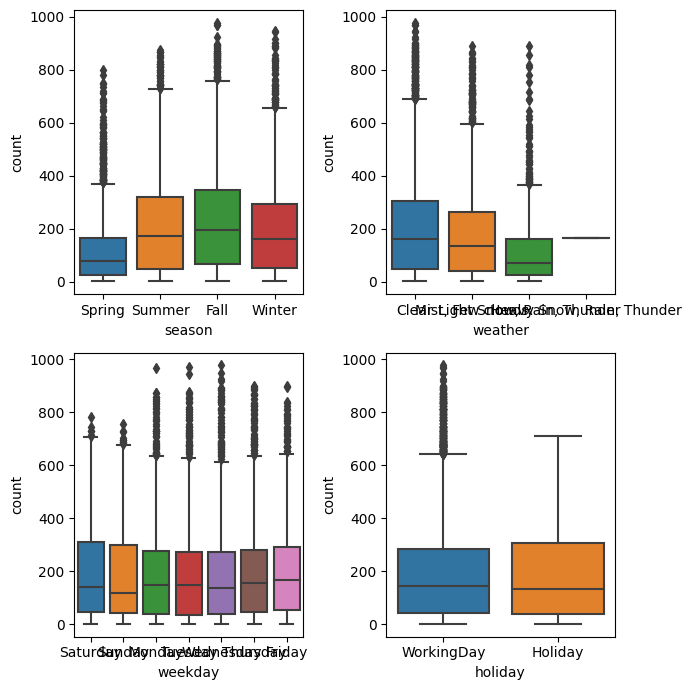

In [81]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (7, 7))
sns.boxplot(x='season', y = 'count', data = train, ax=ax[0, 0])
sns.boxplot(x='weather', y = 'count', data = train, ax=ax[0, 1])
sns.boxplot(x='weekday', y = 'count', data = train, ax=ax[1, 0])
sns.boxplot(x='holiday', y = 'count', data = train, ax=ax[1, 1])

plt.tight_layout()
plt.show()

### pointplot

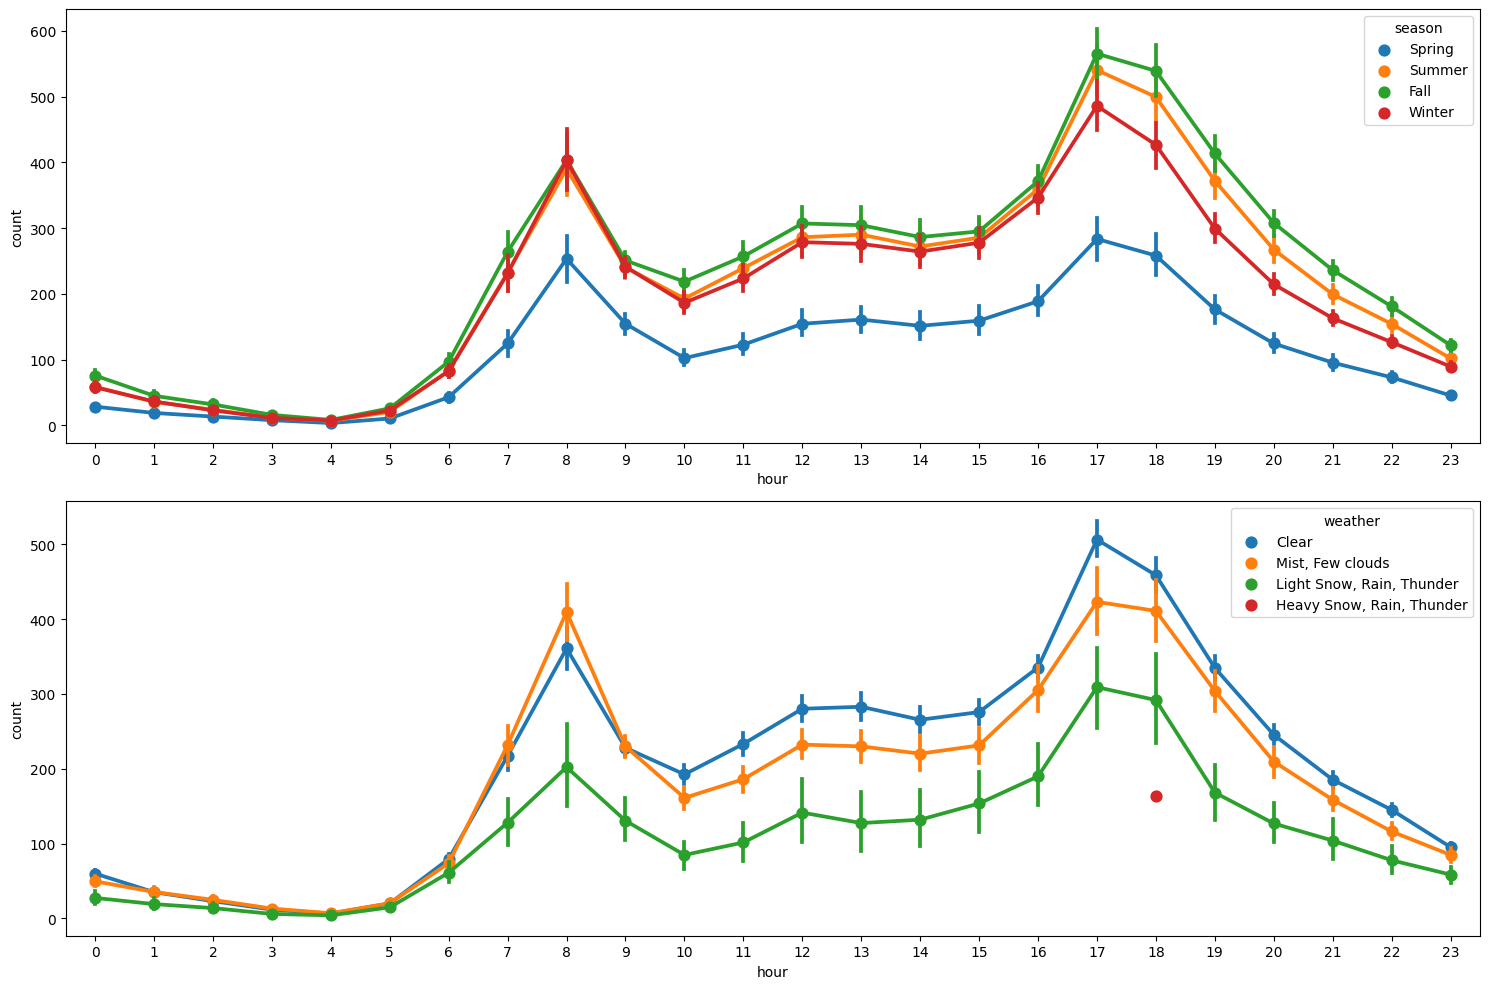

In [82]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 10))

# 계절, 날씨 차이를 확인해보자.

sns.pointplot(x='hour', y='count', hue='season', data=train, ax=ax[0])
sns.pointplot(x='hour', y='count', hue='weather', data=train, ax=ax[1])
plt.tight_layout()
plt.show()

- 강한 강우일 때의 빨간 점 하나, 어떻게 할 것인가?
    - 시스템 이상인지 확인하기: value_counts() 확인 후, 직접 그 날짜의 날씨, 대여 상황 확인하기 -> 관련업무자에게 보고(데이터 시각화로 이상치를 잡아낼 수도 있음!!!)
    - 우리는 강한 강우가 포함된 행을 제거하겠다.

In [83]:
train['weather'].value_counts()

weather
Clear                        7192
Mist, Few clouds             2834
Light Snow, Rain, Thunder     859
Heavy Snow, Rain, Thunder       1
Name: count, dtype: int64

## 회귀식 산점도
- regplot() 사용
- 2X2로 만들기

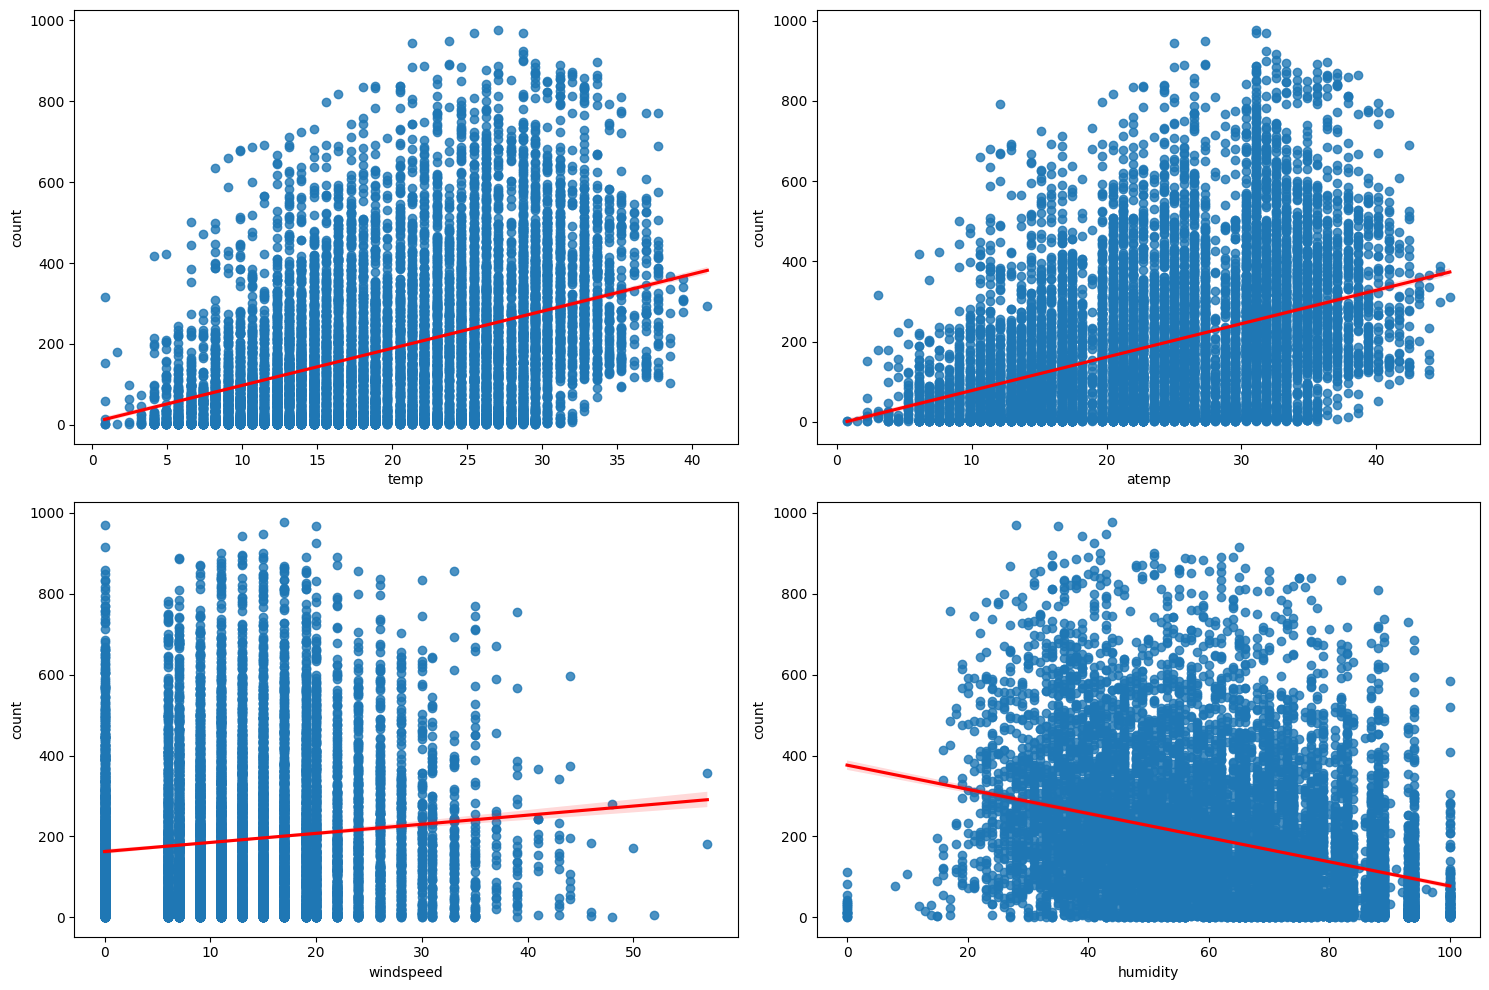

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.regplot(x='temp', y='count', data=train, ax=ax[0, 0], line_kws={'color': 'red'})
sns.regplot(x='atemp', y='count', data=train, ax=ax[0, 1], line_kws={'color': 'red'})
sns.regplot(x='windspeed', y='count', data=train, ax=ax[1, 0], line_kws={'color': 'red'})
sns.regplot(x='humidity', y='count', data=train, ax=ax[1, 1], line_kws={'color': 'red'})

plt.tight_layout()
plt.show()

### 최종 input 변수 선정

> cols =['', '', '']
>> final_df = train.loc[train['weather'] == "강한강우", cols]

# 탐색적 데이터 분석이 끝난 데이터가 됨